<a href="https://colab.research.google.com/github/ysedurepo/deep_learning/blob/main/D%C3%A9mo_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q torch_snippets
!pip install torch_snippets==0.15.2

In [9]:
import torch
import torch.nn as nn
from torch_snippets import *
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision.utils import make_grid
import torch.optim as optim

In [10]:
from torchvision.datasets import MNIST
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(0.5,))])
data_loader = torch.utils.data.DataLoader(MNIST('~/data', train=True, download=True, transform=transform), batch_size=128, shuffle=True, drop_last=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 514kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.70MB/s]


In [11]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3),
    nn.Linear(1024, 512),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.3),
    nn.Linear(256, 1),
    nn.Sigmoid()
    )
  def forward(self, x):
    return self.model(x)

In [12]:
!pip install torch_summary
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator,torch.zeros(1,784))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

In [13]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
    nn.Linear(100, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 1024),
    nn.LeakyReLU(0.2),
    nn.Linear(1024, 784),
    nn.Tanh()
    )
  def forward(self, x):
    return self.model(x)

In [14]:
generator = Generator().to(device)
summary(generator,torch.zeros(1,100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69

In [15]:
def noise(size):
  n = torch.randn(size, 100)
  return n.to(device)

In [16]:
def discriminator_train_step(real_data, fake_data, d_optimizer, loss):
  d_optimizer.zero_grad()
  prediction_real = discriminator(real_data)
  error_real = loss(prediction_real, torch.ones(len(real_data),1).to(device))
  error_real.backward()
  prediction_fake = discriminator(fake_data)
  error_fake = loss(prediction_fake, torch.zeros(len(fake_data),1).to(device))
  error_fake.backward()
  d_optimizer.step()
  return error_real + error_fake

In [17]:
def generator_train_step(fake_data, real_data_size, g_optimizer, loss):
  g_optimizer.zero_grad()
  prediction = discriminator(fake_data)
  error = loss(prediction, torch.ones(real_data_size,1).to(device))
  error.backward()
  g_optimizer.step()
  return error

In [18]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
d_optimizer= optim.Adam(discriminator.parameters(),lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
loss = nn.BCELoss()
num_epochs = 200
log = Report(num_epochs)

EPOCH: 1.000	d_loss: 0.603	g_loss: 4.760	(19.65s - 3910.62s remaining)
EPOCH: 2.000	d_loss: 0.459	g_loss: 7.571	(34.48s - 3413.25s remaining)
EPOCH: 3.000	d_loss: 0.833	g_loss: 3.258	(49.29s - 3236.61s remaining)
EPOCH: 4.000	d_loss: 1.026	g_loss: 1.899	(63.58s - 3115.35s remaining)
EPOCH: 5.000	d_loss: 0.785	g_loss: 2.549	(78.60s - 3065.21s remaining)
EPOCH: 6.000	d_loss: 0.550	g_loss: 2.859	(92.91s - 3004.01s remaining)
EPOCH: 7.000	d_loss: 0.471	g_loss: 2.911	(107.82s - 2972.67s remaining)
EPOCH: 8.000	d_loss: 0.434	g_loss: 3.307	(122.44s - 2938.54s remaining)
EPOCH: 9.000	d_loss: 0.422	g_loss: 3.378	(136.81s - 2903.34s remaining)
EPOCH: 10.000	d_loss: 0.502	g_loss: 2.847	(151.06s - 2870.08s remaining)
EPOCH: 11.000	d_loss: 0.510	g_loss: 2.762	(165.31s - 2840.28s remaining)
EPOCH: 12.000	d_loss: 0.519	g_loss: 2.934	(179.85s - 2817.57s remaining)
EPOCH: 13.000	d_loss: 0.591	g_loss: 2.608	(194.52s - 2798.04s remaining)
EPOCH: 14.000	d_loss: 0.588	g_loss: 2.551	(208.75s - 2773.42s rema

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


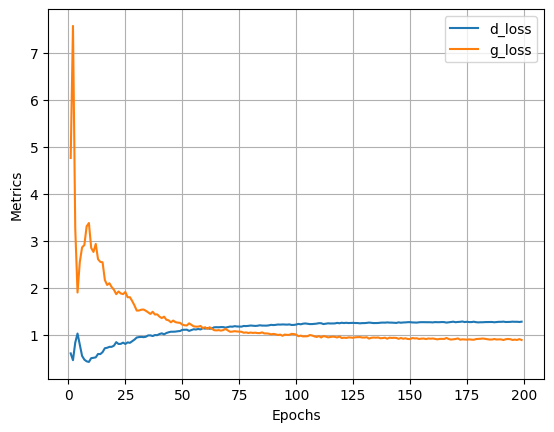

In [19]:
for epoch in range(num_epochs):
  N = len(data_loader)
  for i, (images, _) in enumerate(data_loader):
    real_data = images.view(len(images), -1).to(device)
    fake_data = generator(noise(len(real_data))).to(device)
    fake_data = fake_data.detach()
    d_loss = discriminator_train_step(real_data, fake_data, d_optimizer, loss)

    fake_data = generator(noise(len(real_data))).to(device)
    g_loss = generator_train_step(fake_data, len(real_data), g_optimizer, loss)
    log.record(epoch+(i+1)/N, d_loss=d_loss.item(), g_loss=g_loss.item(), end='\r')
  log.report_avgs(epoch+1)
log.plot_epochs(['d_loss', 'g_loss'])

In [20]:
from matplotlib import pyplot as plt

def show(grid_tensor, sz=5):
    plt.figure(figsize=(sz, sz))
    plt.imshow(grid_tensor)
    plt.axis('off')
    plt.show()

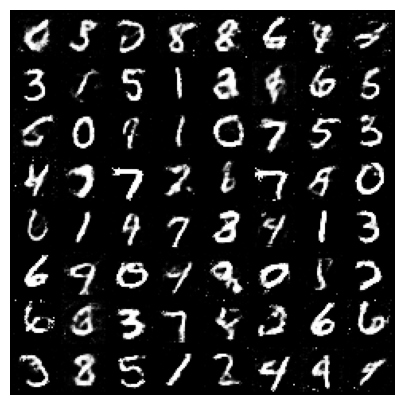

In [22]:
z = torch.randn(64, 100).to(device)
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)
grid = make_grid(sample_images, nrow=8, normalize = True)
show(grid.cpu().detach().permute(1,2,0), sz=5)